In [10]:
from torch import nn 
import torch 
import matplotlib.pyplot as plt
torch.__version__

'2.4.1+cu124'

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"


#### Create a straight line dataset using the linear regression formula (weight * X + bias).

1. Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
2. Split the data into 80% training, 20% testing.
3. Plot the training and testing data so it becomes visual.


In [12]:
weights = 0.3
bias = 0.9
start = 0
end = 1
step = 0.01
X = torch.arange(start,end,step,dtype=torch.float).unsqueeze(dim=1)
y = weights * X + bias
print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [13]:
train_test_split = int(0.8*len(X))
X_train,y_train = X[:train_test_split],y[:train_test_split]
X_test,y_test = X[train_test_split:],y[train_test_split:]
len(X_train),len(X_test),len(y_train),len(y_test)


(80, 20, 80, 20)

In [14]:
def plot_predictions(train_data=X_train,test_data=X_test,train_label=y_train,test_label=y_test,predictions=None):
    """
    Plot the train,test data and prediction if available
    """
    plt.figure(figsize=(10,7))
    
    plt.scatter(train_data,train_label,c="b",label="Training data")

    plt.scatter(test_data,test_label,c="g",label="Testing data")

    if predictions is not None:
        plt.scatter(test_data,predictions,c="r",label = "Predictions")

    plt.legend()


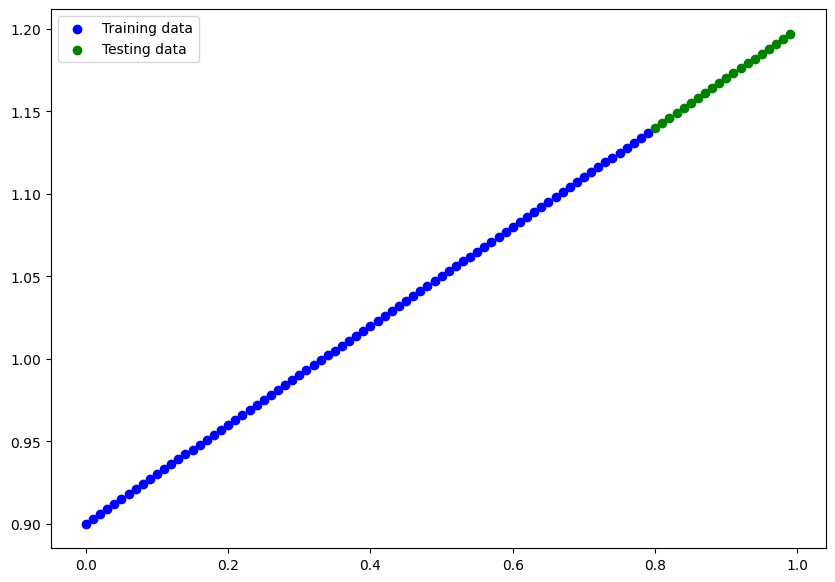

In [15]:
plot_predictions()


### Build a PyTorch model by subclassing nn.Module.

1. Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
2. Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
3. Once you've constructed the model, make an instance of it and check its state_dict().
`Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.`



In [16]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,out_features=1,dtype=torch.float,device=device)

    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2259]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.9754], device='cuda:0'))])


### Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

1. Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters
from the model you created in 2.
2. Write a training loop to perform the appropriate training steps for 300 epochs.
3. The training loop should test the model on the test dataset every 20 epochs.


In [17]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.001)

In [18]:
model_0.to(device)
next(model_0.parameters()).device

device(type='cuda', index=0)

In [19]:
epochs = 2000

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)
# Training loop
for epoch in range(epochs):
    # Model dot train
    model_0.train()
    # Do the forward Pass
    y_preds = model_0(X_train)
    # Calculate the loss
    loss = loss_fn(y_preds,y_train)
    # Optimizer Zero grad
    optimizer.zero_grad()
    # Loss backward
    loss.backward()
    # Optimizer Step
    optimizer.step()

    if epoch % 20 == 0:
        # Testing
        # Model dot eval
        model_0.eval()
        # With torch inference mode
        with torch.inference_mode():
            y_test_preds = model_0(X_test)
            test_loss = loss_fn(y_test_preds,y_test)
    # Print out what's happening
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.04617559537291527 | Test Loss: 0.00778192887082696
Epoch: 1 | Loss: 0.04501957818865776 | Test Loss: 0.00778192887082696
Epoch: 2 | Loss: 0.04386356845498085 | Test Loss: 0.00778192887082696
Epoch: 3 | Loss: 0.04270755872130394 | Test Loss: 0.00778192887082696
Epoch: 4 | Loss: 0.041551556438207626 | Test Loss: 0.00778192887082696
Epoch: 5 | Loss: 0.04039553180336952 | Test Loss: 0.00778192887082696
Epoch: 6 | Loss: 0.03923952206969261 | Test Loss: 0.00778192887082696
Epoch: 7 | Loss: 0.0380835086107254 | Test Loss: 0.00778192887082696
Epoch: 8 | Loss: 0.03692749887704849 | Test Loss: 0.00778192887082696
Epoch: 9 | Loss: 0.035771485418081284 | Test Loss: 0.00778192887082696
Epoch: 10 | Loss: 0.034615471959114075 | Test Loss: 0.00778192887082696
Epoch: 11 | Loss: 0.033459458500146866 | Test Loss: 0.00778192887082696
Epoch: 12 | Loss: 0.032303448766469955 | Test Loss: 0.00778192887082696
Epoch: 13 | Loss: 0.031151000410318375 | Test Loss: 0.00778192887082696
Epoch: 14 |


### Make predictions with the trained model on the test data.

1. Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).


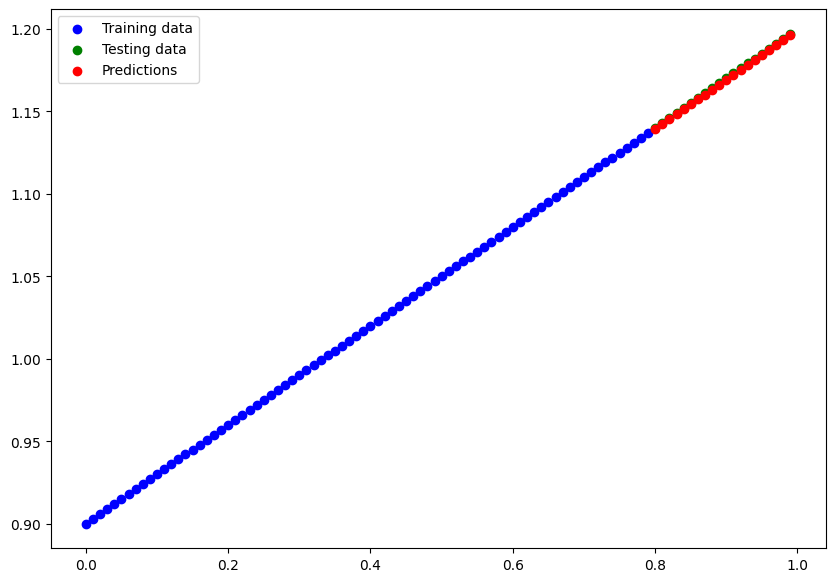

In [20]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
plot_predictions(predictions=y_preds.cpu())


### Save your trained model's state_dict() to file.

1. Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
2. Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.


In [21]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = "01_Pytorch_Workflow_Excerise_Model.pt"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

In [22]:
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)
print(f"Saved model parameters: \n{model_0.state_dict()}")

Saving model to: models/01_Pytorch_Workflow_Excerise_Model.pt
Saved model parameters: 
OrderedDict({'linear_layer.weight': tensor([[0.2992]], device='cuda:0'), 'linear_layer.bias': tensor([0.8998], device='cuda:0')})


In [23]:
model_1 = LinearRegressionModel()
model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
model_1.state_dict()

/tmp/ipykernel_16754/4115364988.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


OrderedDict([('linear_layer.weight', tensor([[0.2992]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8998], device='cuda:0'))])

In [24]:
model_1.eval()
with torch.inference_mode():
    loaded_model_preds = model_1(X_test)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')